<a href="https://colab.research.google.com/github/Darshantawte/AQHIP-Air-Quality-Health-Impact-Predictor-/blob/main/AQHIP_(Air_Quality_Health_Impact_Predictor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
plt.style.use('ggplot')

In [ ]:
dataset = pd.read_csv('/content/air_quality_health_impact_data.csv')

**Getting an Overview of the Dataset**

In [ ]:
dataset.head(10)

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0
5,6,77.997260,36.113445,97.113240,87.769562,32.261206,136.999714,-1.441781,32.635904,4.675127,13,5,2,70.361491,1.0
6,7,29.041806,174.230575,68.578418,186.815370,96.766420,44.982397,34.378592,24.679305,6.610047,10,2,2,65.819949,1.0
7,8,433.088073,278.629026,83.673782,106.947943,9.707749,131.566014,33.707434,40.373157,17.376644,11,8,1,100.000000,0.0
8,9,300.557506,149.023028,185.789347,138.745212,90.267117,59.409878,33.123146,36.035212,14.464875,8,6,4,100.000000,0.0
9,10,354.036289,252.883645,182.150363,179.297055,44.521212,117.957437,9.537247,64.099202,14.253878,13,5,1,100.000000,0.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

In [ ]:
dataset.shape

(5811, 15)

In [ ]:
dataset.columns

Index(['RecordID', 'AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature',
       'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases',
       'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass'],
      dtype='object')

In [ ]:
dataset.describe()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,2906.000000,248.438476,148.654997,100.223714,102.293445,49.456838,149.312431,14.975500,54.776853,9.989177,9.974187,4.988986,2.001033,93.785223,0.281191
std,1677.635538,144.777638,85.698500,58.096612,57.713175,28.530329,86.534240,14.483067,26.020786,5.776950,3.129234,2.216791,1.398794,13.318904,0.714075
min,1.000000,0.005817,0.015848,0.031549,0.009625,0.011023,0.001661,-9.990998,10.001506,0.002094,1.000000,0.000000,0.000000,22.448488,0.000000
25%,1453.500000,122.951293,75.374954,49.435171,53.538538,24.887264,73.999665,2.481500,31.995262,4.952343,8.000000,3.000000,1.000000,98.203057,0.000000
50%,2906.000000,249.127841,147.634997,100.506337,102.987736,49.530165,149.559871,14.942428,54.543904,10.051742,10.000000,5.000000,2.000000,100.000000,0.000000
75%,4358.500000,373.630668,222.436759,151.340260,151.658516,73.346617,223.380126,27.465374,77.641639,14.971840,12.000000,6.000000,3.000000,100.000000,0.000000
max,5811.000000,499.858837,299.901962,199.984965,199.980195,99.969561,299.936812,39.963434,99.997493,19.999139,23.000000,14.000000,12.000000,100.000000,4.000000


**Finding - Multiclass Classification Problem wherein based on input features we have to predict HealthImpact class among 5 classes**

In [ ]:
dataset['HealthImpactClass'].unique()

array([0., 1., 3., 2., 4.])

In [ ]:
dataset.columns

Index(['RecordID', 'AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature',
       'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases',
       'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass'],
      dtype='object')

In [ ]:
dataset['HealthImpactClass'].value_counts(normalize=True)

HealthImpactClass
0.0    0.827396
1.0    0.099639
2.0    0.046980
3.0    0.016348
4.0    0.009637
Name: proportion, dtype: float64

Finding:

1. Its an unbalanced dataset.
2. 83% of datapoints belong to class 0 (Very poor)

**Performing EDA**

<Figure size 640x480 with 0 Axes>

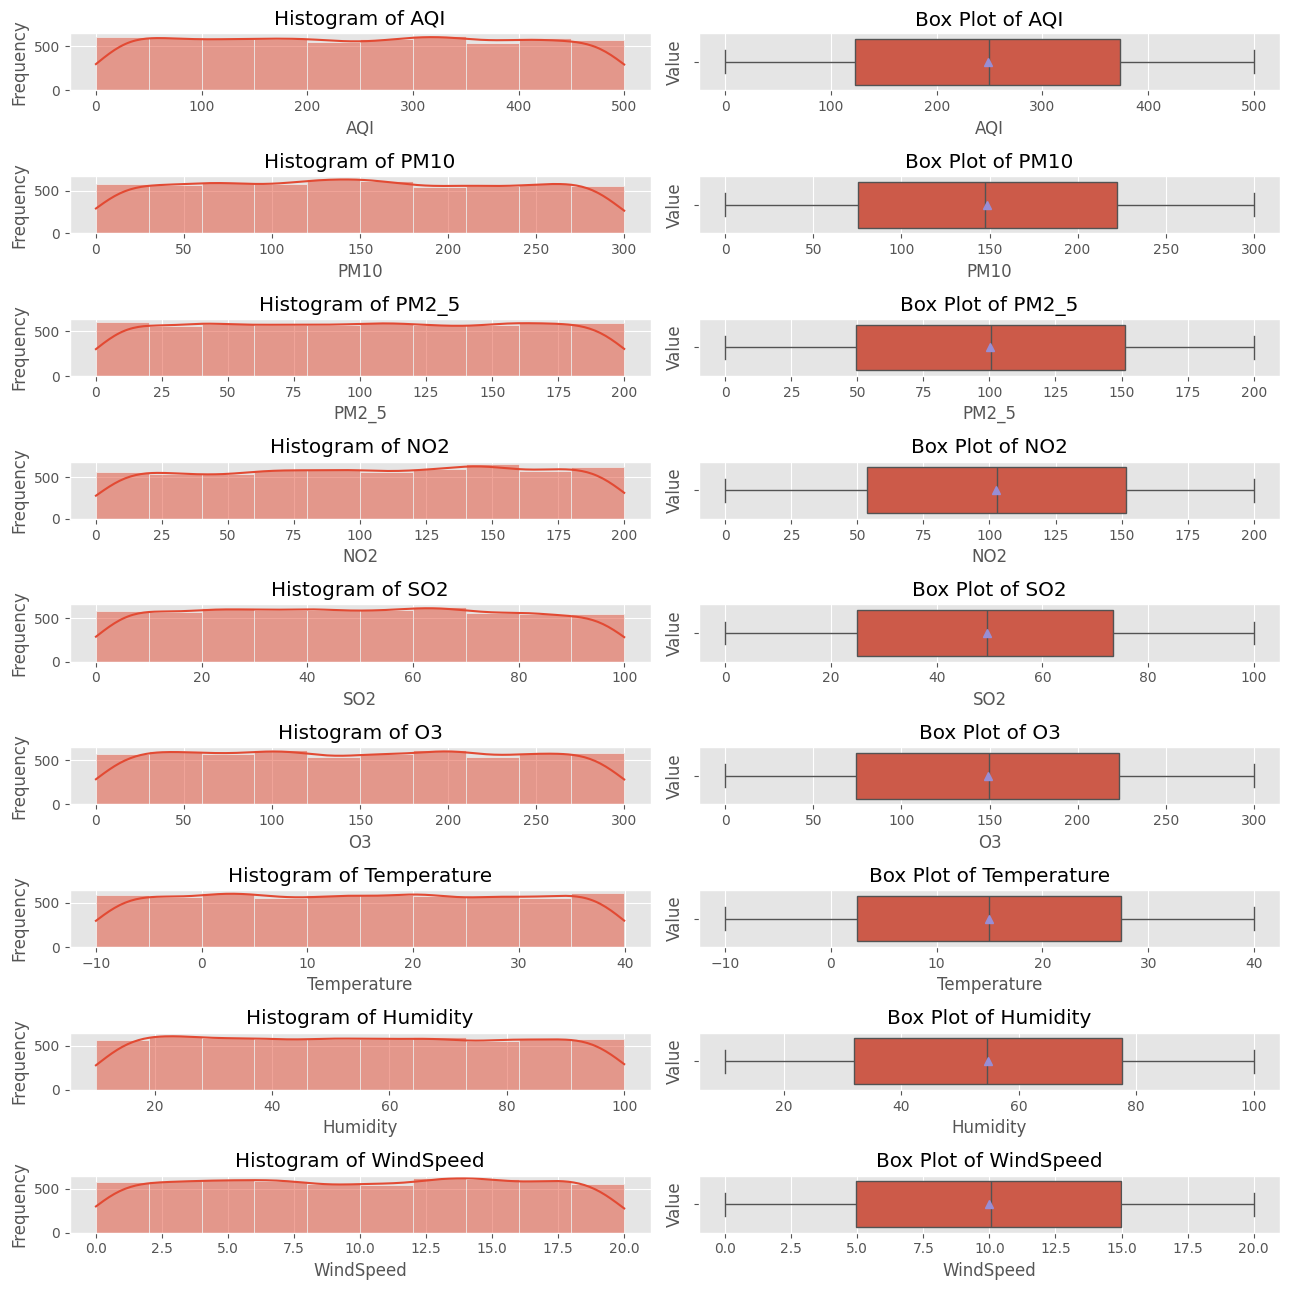

In [ ]:
numeric_cols = ['AQI','PM10','PM2_5','NO2','SO2','O3','Temperature','Humidity','WindSpeed']

# Create subplots for side-by-side visualization (adjust figsize as needed)
plt.subplots_adjust(wspace=200, hspace=200)
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=2, figsize=(13, 13))

# Loop through numerical columns and create plots
for i, col in enumerate(numeric_cols):
    ax_hist, ax_box = axes[i]  # Unpack axes for each column
    sns.histplot(dataset[col], ax=ax_hist, bins=10, kde=True)  # Histogram with KDE
    sns.boxplot(dataset[col], ax=ax_box, showmeans=True,orient='h')  # Boxplot with mean marker
    ax_hist.set_title(f'Histogram of {col}')
    ax_box.set_title(f'Box Plot of {col}')
    ax_hist.set_xlabel(col)
    ax_box.set_xlabel(col)
    ax_hist.set_ylabel('Frequency')
    ax_box.set_ylabel('Value')
# Adjust layout and display plots
plt.tight_layout()
plt.show()

In [ ]:
corrMatrix = dataset.corr()

<Axes: >

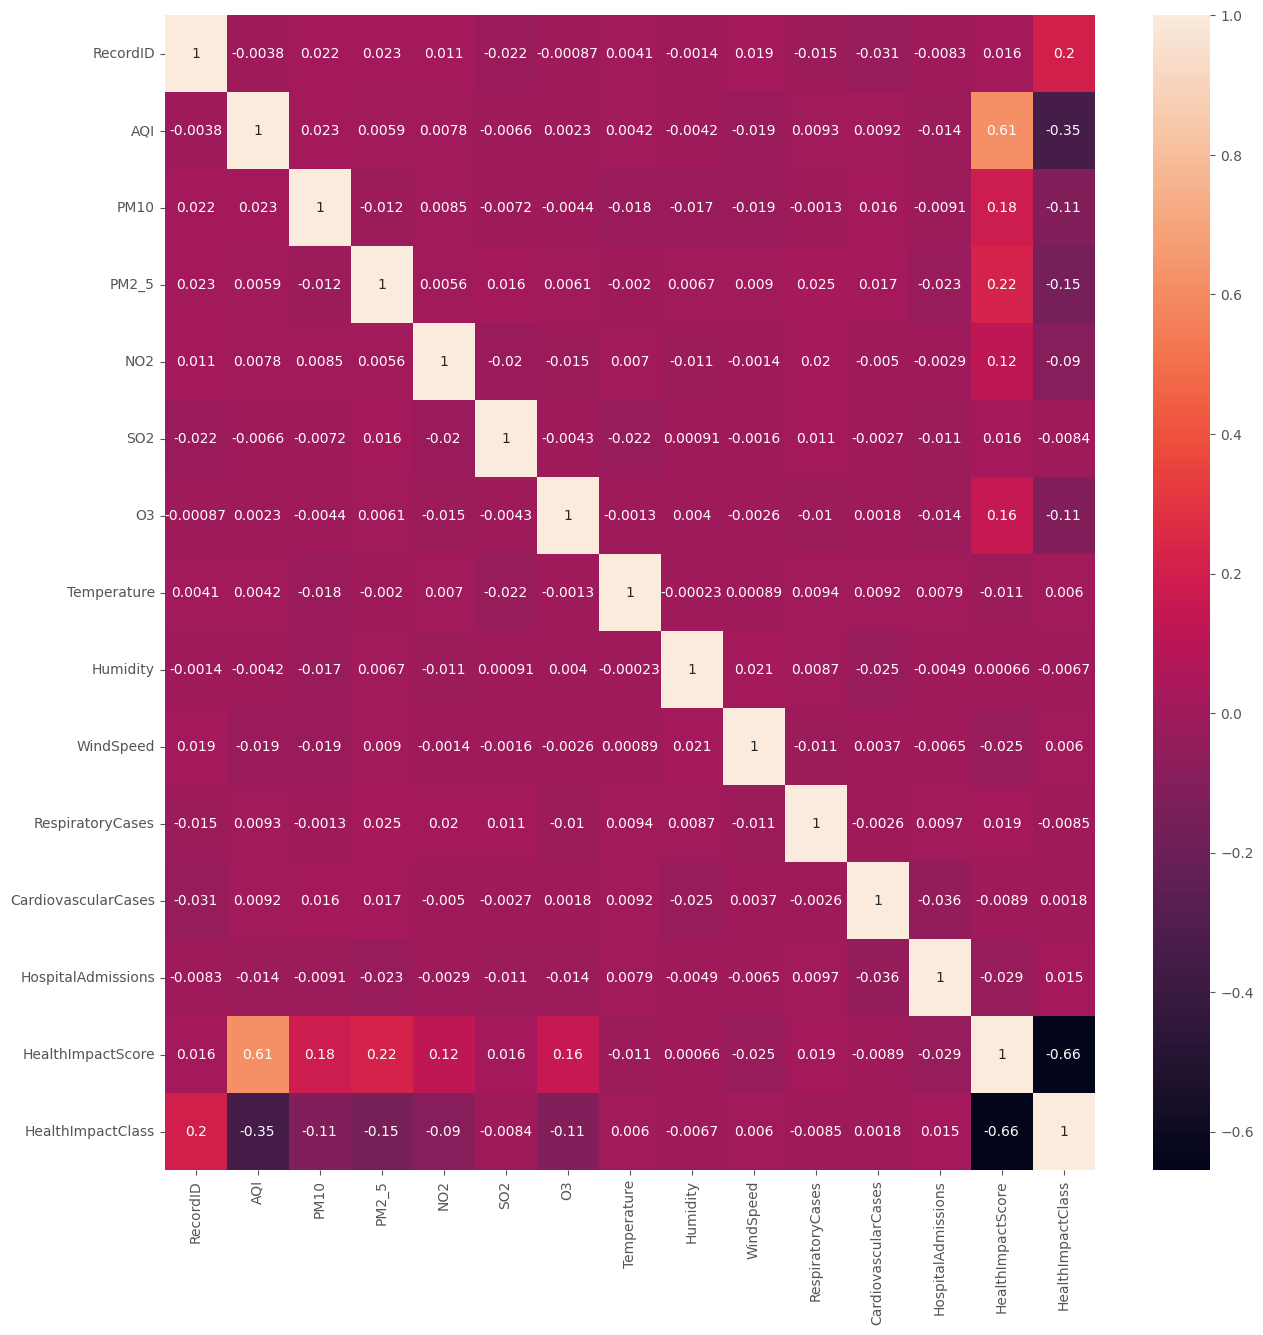

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data=corrMatrix,annot=True)

**Observations**:

1. **AQI and Healthimpact class are inversely proportional**
2. **HealthImpactclass and HealthimpactScore are inversely proportional**
3. **AQI and Healthimpactscore are directly proportional**

<Axes: >

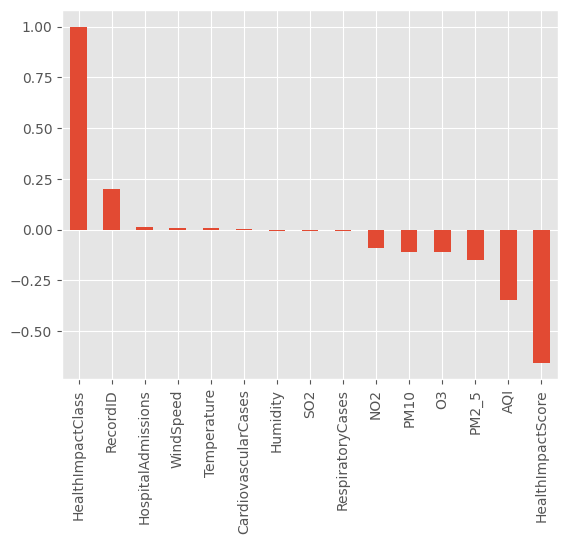

In [ ]:
corrMatrix['HealthImpactClass'].sort_values(ascending=False).plot(kind='bar')

In [ ]:
groupData = dataset.groupby(by=['HealthImpactClass'])

In [ ]:
groupData[['AQI','PM2_5','SO2','O3']].median()

,AQI,PM2_5,SO2,O3
HealthImpactClass,,,,
0.0,284.540487,107.010296,49.661151,156.788184
1.0,60.181788,79.129364,47.711303,120.100405
2.0,40.862673,51.701250,50.244179,102.694860
3.0,70.691777,58.381923,48.012302,102.422897
4.0,273.325350,106.594737,55.809559,144.567947


In [ ]:
HospitalizedData = groupData[['HospitalAdmissions']].count()
HospitalizedData['% of Patients'] = (HospitalizedData['HospitalAdmissions'] / 5811) * 100

In [ ]:
HospitalizedData

,HospitalAdmissions,% of Patients
HealthImpactClass,,
0.0,4808,82.739632
1.0,579,9.963862
2.0,273,4.697987
3.0,95,1.634830
4.0,56,0.963690


**Findings**:

1. **More than 93% of patients belong to HealthImpactClass 0 (very poor) and 1(poor)**

**Performing DataPreprocessing**

In [ ]:
dataset.isnull().sum()

RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64

In [ ]:
dataset.head(5)

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


Findings: No missing values in the dataset

In [ ]:
dataset.drop(columns=['RecordID','WindSpeed'],inplace=True)

In [ ]:
dataset.head(5)

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,7,5,1,97.244041,0.0
1,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,10,2,0,100.000000,0.0
2,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,13,3,0,100.000000,0.0
3,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,8,8,1,100.000000,0.0
4,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,9,0,1,95.182643,0.0


**Perform Feature Engineering**

In [ ]:
def find_z_score_outliers(series, threshold=3):
  """
  This function takes a Pandas Series of numerical data and finds outliers based on the z-score method.

  Args:
      series (pd.Series): A Pandas Series containing numerical data.
      threshold (float, optional): The threshold for z-scores to be considered outliers. Defaults to 3.

  Returns:
      list: A list of outliers identified by the z-score method.
  """
  # Calculate the mean and standard deviation of the series
  mean = series.mean()
  std = series.std()

  # Calculate the z-scores for each data point
  z_scores = (series - mean) / std

  # Identify outliers based on the threshold
  outliers = series[abs(z_scores) > threshold].tolist()

  # Print the outliers
  print(f"Outliers (z-score > {threshold} or z-score < {-threshold}):")
  if outliers:
      for outlier in outliers:
          print(outlier)
  else:
      print("No outliers found based on the specified threshold.")


**Findings** :

1. There are no outliers in the dataset

**Feature Scaling and Model Building**

In [ ]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

Splitting dataset in train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Defining ML Models and Respective Hyperparameters to be tunned**

In [ ]:
model_names = ['SVC','KNeighborsClassifier','RandomForestClassifier','DecisionTreeClassifier','XGBClassifier','GaussianNB']

models = [SVC(),
          KNeighborsClassifier(),
          RandomForestClassifier(),
          DecisionTreeClassifier(),
          XGBClassifier(),
          GaussianNB()]


In [ ]:
param_grids = [
  {'C':[0.1,0.2,0.3,0.4,0.5,0.6,1.0,2.0,5.0,6.0,7.0,0.07,0.08,0.05,0.04,0.45,0.78],'kernel': ['linear','rbf']},
  {'n_neighbors': [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,200,250,300,500,1000],'weights':['uniform','distance']},
  {'n_estimators':[100,200,500,800,1000],'criterion':['gini','entropy']},
  {'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[5,10,15,20,None]},
  {'learning_rate': [0.05, 0.1, 0.3,0.1,0.01,0.001,0.0001,1.0,0.2,0.25,0.4,0.015],'n_estimators': [100,200,500,800,1000],'max_depth': [3,5,8]},
  {'var_smoothing': np.logspace(-9, 0, num=100)}
]

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score

def tune_and_evaluate_models(X_train, y_train, X_val, y_val, model_names, models, param_grids, cv=5):
  """
  Tunes hyperparameters, evaluates, and returns results for multiple models.

  Args:
      X_train (array-like): Training data features.
      y_train (array-like): Training data labels.
      X_val (array-like): Validation data features.
      y_val (array-like): Validation data labels.
      models (list): List of scikit-learn classification models (e.g., SVC, RandomForestClassifier).
      param_grids (list): List of dictionaries, each containing hyperparameter search spaces for a corresponding model in 'models'.
      scorers (dict): Dictionary mapping metric names to scoring functions (e.g., 'accuracy': accuracy_score).
      cv (int, optional): Number of folds for cross-validation. Defaults to 5.

  Returns:
      dict: Dictionary containing results for each model, including:
          - model_name (str): Name of the model.
          - best_params (dict): Best hyperparameters found during tuning.
          - cv_results_ (dict): Cross-validation results from the tuning process.
          - val_scores (dict): Validation scores for each metric in 'scorers'.
  """


  for model_name, model, param_grid in zip(model_names, models, param_grids):
    # Create search object (GridSearchCV or RandomizedSearchCV)
    search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)

    # Fit the search object to training data
    search.fit(X_train, y_train)

    # Extract best parameters and cross-validation results
    best_params = search.best_params_
    cv_results = search.cv_results_

    # Evaluate the best model on validation data for each metric
    y_pred = search.predict(X_val)
    model_accuracy = accuracy_score(y_val,y_pred)

    print(f'Model_name : {model_name} , Best_Params : {best_params}, Accuracy : {model_accuracy*100}')


In [ ]:
tune_and_evaluate_models(X_train_scaled, y_train, X_test_scaled, y_test, model_names, models, param_grids)

Model_name : SVC , Best_Params : {'C': 2.0, 'kernel': 'linear'}, Accuracy : 94.42127215849844
Model_name : KNeighborsClassifier , Best_Params : {'n_neighbors': 10, 'weights': 'distance'}, Accuracy : 92.07507820646507
Model_name : RandomForestClassifier , Best_Params : {'criterion': 'gini', 'n_estimators': 500}, Accuracy : 95.72471324296143
Model_name : DecisionTreeClassifier , Best_Params : {'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}, Accuracy : 95.51616266944734
Model_name : XGBClassifier , Best_Params : {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 200}, Accuracy : 95.62043795620438
Model_name : GaussianNB , Best_Params : {'var_smoothing': 0.5336699231206302}, Accuracy : 93.2221063607925
